In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

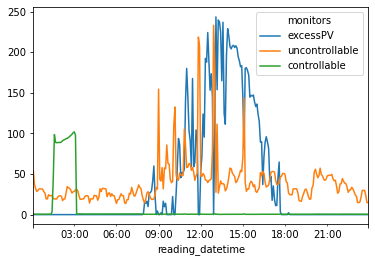

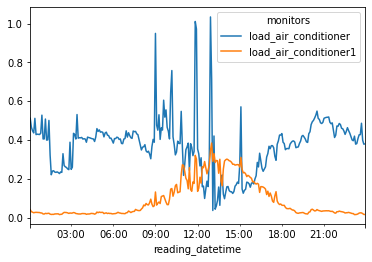

In [160]:
# House 1 data Analysis
house1 = pd.read_csv('../data/64613.csv')
# print(house1.columns)
house1.drop(columns='Unnamed: 0', inplace=True)
house1.drop_duplicates(inplace=True)
house1['reading_datetime'] = pd.to_datetime(house1['reading_datetime'])
house1.loc[house1['circuit_id'] == 58077,'monitors'] = 'load_air_conditioner1'
house1.loc[house1.circuit_id == 70173, 'monitors'] = 'ppt1'
house1.loc[house1.circuit_id == 70174, 'monitors'] = 'ppt2'
house1.loc[house1.circuit_id == 70175, 'monitors'] = 'ppt3'
house1.loc[house1.circuit_id == 58086, 'monitors'] = 'ppt4'
house1.set_index(keys=['reading_datetime', 'monitors'], inplace=True, drop=True)
house1.sort_index(inplace=True)
house1.drop(columns=['site_id', 'circuit_id', 'energy_pos', 'energy_neg'], inplace=True)


house1 = house1.stack().unstack(level=1)
uncontrollable = ['load_lighting', 'load_stove', 'ppt1', 'ppt2', 'ppt3', 'ppt4', 'load_spa']
controllable = ['load_air_conditioner', 'load_air_conditioner1', 'load_hot_water']
house1['uncontrollable'] = house1[uncontrollable].sum(axis=1)
house1['controllable'] = house1[controllable].sum(axis=1)
house1['excessPV'] = (house1.pv_site_net - house1.uncontrollable).clip(lower=0)
house1 = house1.droplevel(level=1)
house1['2019-12-01'].plot(y=['excessPV', 'uncontrollable', 'controllable'])
plt.show()
house1['2019-12-01'].plot(y=['load_air_conditioner', 'load_air_conditioner1'])
# house1['2019-06-01':'2019-06-07'].uncontrollable.plot(figsize=(12,12))
# house1['2019-06-01':'2019-06-07'].controllable.plot(figsize=(12,12))
# house1['2019-06-01':'2019-06-07'].pv_site_net.plot()

# house1.loc['2019-02-01', 'load_lighting']
# .energy.unstack(level=1).plot(legend=False)

In [166]:
# House2 data analysis
# No Pool or Hot water
house2 = pd.read_csv('../data/69914.csv')
# print(house1.columns)
house2.drop(columns='Unnamed: 0', inplace=True)
house2.drop_duplicates(inplace=True)
house2['reading_datetime'] = pd.to_datetime(house2['reading_datetime'])
house2.head(20)

,site_id,reading_datetime,circuit_id,monitors,energy,energy_pos,energy_neg
0,69914,2019-01-01 00:15:00,58078,ac_load_net,16.8622,16.8622,0.0000
1,69914,2019-01-01 00:15:00,58080,load_air_conditioner,0.3006,0.3006,0.0000
2,69914,2019-01-01 00:15:00,72317,load_other,0.1867,0.1867,0.0000
3,69914,2019-01-01 00:15:00,72319,load_refrigerator,9.7156,9.7156,0.0000
4,69914,2019-01-01 00:15:00,72318,load_stove,0.0444,0.0444,0.0000
5,69914,2019-01-01 00:15:00,58079,pv_site_net,-0.1222,0.0000,0.1222
6,69914,2019-01-01 00:30:00,58078,ac_load_net,17.1858,17.1858,0.0000
7,69914,2019-01-01 00:30:00,58080,load_air_conditioner,0.3028,0.3028,0.0000
8,69914,2019-01-01 00:30:00,72317,load_other,0.1322,0.1322,0.0000
9,69914,2019-01-01 00:30:00,72319,load_refrigerator,9.8211,9.8211,0.0000


In [162]:
# House3
house3 = pd.read_csv('../data/70177.csv')
# print(house1.columns)
house3.drop(columns='Unnamed: 0', inplace=True)
house3.drop_duplicates(inplace=True)
house3['reading_datetime'] = pd.to_datetime(house3['reading_datetime'])
house3

,site_id,reading_datetime,circuit_id,monitors,energy,energy_pos,energy_neg
0,70177,2019-01-01 00:15:00,58069,ac_load_net,3.3711,3.3711,0.0000
1,70177,2019-01-01 00:15:00,58071,battery_storage,-65.7181,0.0000,65.7181
2,70177,2019-01-01 00:15:00,72516,load_air_conditioner,1.1847,1.1847,0.0000
3,70177,2019-01-01 00:15:00,72515,load_other,10.8208,10.8208,0.0000
4,70177,2019-01-01 00:15:00,72517,load_spa,-0.0172,0.0000,0.0172
...,...,...,...,...,...,...,...
634531,70177,2019-12-31 23:55:00,58071,battery_storage,-21.6525,0.0000,21.6525
634532,70177,2019-12-31 23:55:00,72516,load_air_conditioner,1.2019,1.2019,0.0000
634533,70177,2019-12-31 23:55:00,72515,load_other,6.3706,6.3706,0.0000
634534,70177,2019-12-31 23:55:00,72517,load_spa,1.2586,1.2586,0.0000


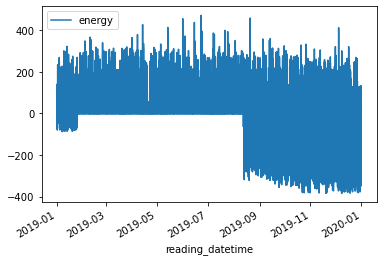

In [158]:
# House3
house4 = pd.read_csv('../data/70210.csv')
# print(house1.columns)
house4.drop(columns='Unnamed: 0', inplace=True)
house4.drop_duplicates(inplace=True)
house4['reading_datetime'] = pd.to_datetime(house4['reading_datetime'])
house4.set_index(keys=['reading_datetime', 'monitors'], inplace=True)
house4.sort_index(inplace=True)
ac_net = house4.xs('ac_load_net', level=1)
ac_net.plot(y=['energy'])

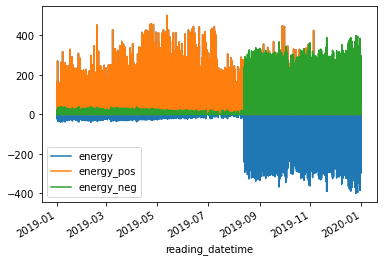

In [103]:
# House3
house5 = pd.read_csv('../data/70243.csv')
# print(house1.columns)
house5.drop(columns='Unnamed: 0', inplace=True)
house5.drop_duplicates(inplace=True)
house5['reading_datetime'] = pd.to_datetime(house5['reading_datetime'])
house5.set_index('reading_datetime', inplace=True)
house5.sort_index(inplace=True)
house5[house5.monitors == 'ac_load_net'].plot(y=['energy', 'energy_pos', 'energy_neg'])

In [154]:
file = '../data/97245.csv'
headers = pd.read_csv(file, nrows=0).columns.tolist()[2:]
house10 = pd.read_csv('../data/97245.csv', usecols=headers)
house10.drop_duplicates(inplace=True)
house10['reading_datetime'] = pd.to_datetime(house10['reading_datetime'])
house10.set_index(keys=['reading_datetime', 'monitors'], inplace=True)
house10.sort_index(inplace=True)
# house10 = house10.stack().unstack(level=1)
subboard = house10.xs('load_subboard', level=1)
subboard['2019-02'].plot(y=['energy', 'energy_pos', 'energy_neg'])
# ac_net = house10.xs('ac_load_net', level=1)
# ac_net['2019-02-20'].plot(y=['energy', 'energy_pos', 'energy_neg'])


ValueError: Index contains duplicate entries, cannot reshape